# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 10

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash;  30 баллов
* Задача 2 &mdash;  60 баллов
* Задача 3 &mdash;  60 баллов






-----

In [30]:
from __future__ import print_function
import pandas as pd
import numpy as np
from tqdm import tqdm as tqdm
from scipy import integrate
import scipy.stats as sps
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm as tqdm
import math
sns.set(font_scale=1.3, palette='Set2')
%matplotlib inline

In [ ]:
# Bot check

# HW_ID: phds_hw10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

### Задача 1 

Проверьте, отличается ли распределение поперечного импульса `pT` $\pi^+$ (`id = 211`) и $\pi^-$ (`id = -211`) мюонов. Постройте гистограммы распределений и провидите относительный t-тест. [Ссылка на данные](https://drive.google.com/file/d/1qGNN9pcSg6safgxqvWeimQEPtlyggOYc/view?usp=share_link)

Сделайте выводы.

In [4]:
df = pd.read_csv('pi.csv')
df.head()

,id,pT,xF,E
0,211,0.996910,1.861209,16.103207
1,211,0.837641,9.728960,84.014754
2,-211,0.540523,0.173407,1.598068
3,-211,0.746933,0.708969,6.168992
4,-211,0.272212,0.431071,3.734888


In [19]:
X,y = np.array(df['pT']), np.array(df['id'])

array([0.99690962, 0.83764074, 0.54052282, ..., 0.1929145 , 0.13978316,
       0.90455547])

In [28]:
X.shape

(20000,)

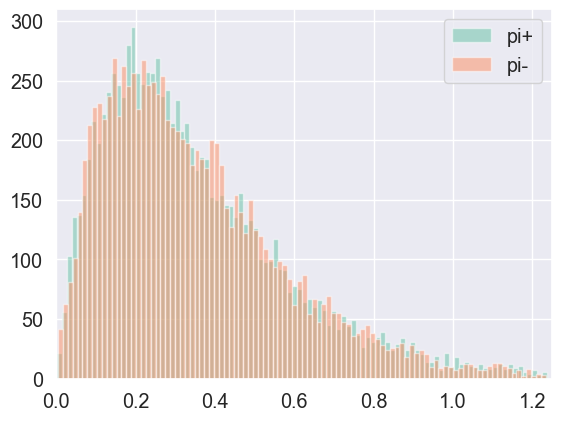

In [37]:
plt.hist(np.sort(X[y ==  211])[:-100],bins=100, label = 'pi+', alpha = 0.5);
plt.hist(np.sort(X[y == -211])[:-100],bins=100, label = 'pi-',alpha = 0.5);
plt.xlim((0,1.25))
plt.legend()

In [39]:
sps.ttest_rel(np.sort(X[y == 211])[:-100], np.sort(X[y == -211])[:-100], alternative = 'two-sided')

Ttest_relResult(statistic=7.819469177629194, pvalue=5.845504547370671e-15)

Объясните выбор теста и сделайте выводы.

**Вывод:**

Хотим сравнить средние двух независимых выборок из неизвестных распределений, о равенстве дисперсии которых ничего не известно. поэтому используем относительный ттест

Нулевую гипотезу отвергаем

### Задача 2 
#### **Профиль физика**


Как известно, частицы по величине спина можно разделить на две группы: бозоны и фермионы. Так как бозоны могут занимать одно и то же квантовое состояние, а фермионы не могут, то системы из нескольких таких частиц будет иметь различные распределения по энергиям. Однако, идеальный газ из таких частиц при высоких температурах будет иметь примерно одинаковое. распределение, а именно больцомонавское. В этой задаче вам требуется посмотреть, используя для этого t-test независимых выборок, как распределения энергий бозе- и ферми-газа отличаются статистически друг от друга при различных температурах.

In [63]:
P_f = lambda x, T: x ** 0.5 / (np.exp((x + T * np.log(T)) / T) + 1)
P_b = lambda x, T: x ** 0.5 / (np.exp((x + T * np.log(T)) / T) - 1)

In [64]:
T = 1.1

Z_f = integrate.quad(P_f, 0, 10 * T, args=(T))[0]
Z_b = integrate.quad(P_b, 0, 10 * T, args=(T))[0]

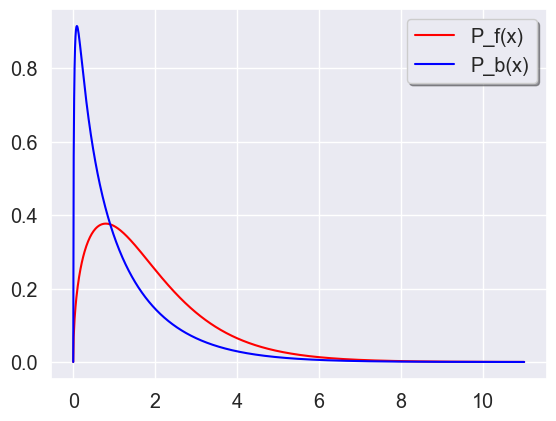

In [65]:
x_vals = np.linspace(0, 10 * T, 1000)
y_vals_f = P_f(x_vals, T)
y_vals_b = P_b(x_vals, T)
plt.figure(1)
plt.plot(x_vals, y_vals_f / Z_f, 'r', label='P_f(x)')
plt.plot(x_vals, y_vals_b / Z_b, 'b', label='P_b(x)')
plt.legend(loc='upper right', shadow=True)
plt.show()

Для начала научимся генериовать выборки из интересующих нас распределений. Чтобы получить такие выборки воспользуемся алгоритмом Метрополиса-Гастингса.

In [66]:
def sample_gas(T, P, steps=20000, sigma=3, cool_down=20):

    Q = lambda t1, t0: np.exp(-(t0)**2/(2 * (sigma * T)**2)/ \
        (np.sqrt(2 * np.pi) * (sigma * T)))

    Z = integrate.quad(P, 0, 100 * T, args=(T))[0]

    x0 = np.random.uniform(0, 2 * T)
    xt = x0

    samples = []

    for i in range(steps):
        xt_candidate = np.abs(np.random.normal(loc=xt, scale=sigma * T))

        accept_prob = (P(xt_candidate, T) * Q(xt, xt_candidate))/ \
            (P(xt, T) * Q(xt_candidate, xt))

        if np.random.uniform(0, 1) < accept_prob:
            xt = xt_candidate

        if i % cool_down == 0:
            samples.append(xt)

    burn_in = 1000 // cool_down

    samples = np.array(samples[burn_in:])

    return samples, Z

In [67]:
samples_f, Z_f = sample_gas(T, P_f)
samples_b, Z_b = sample_gas(T, P_b)

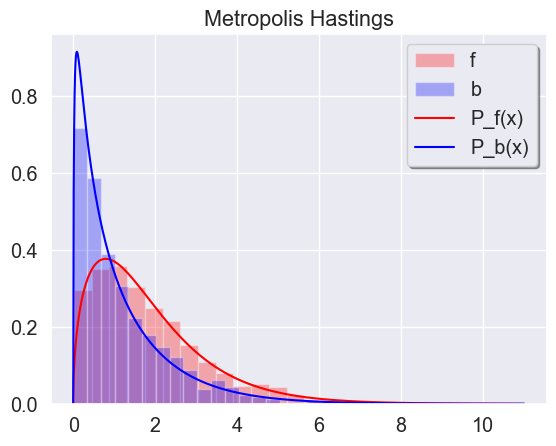

In [68]:
plt.hist(samples_f, bins=20, histtype='bar', facecolor='r', alpha=0.3, density=True, label='f')
plt.hist(samples_b, bins=20, histtype='bar', facecolor='b', alpha=0.3, density=True, label='b')
plt.plot(x_vals, y_vals_f/Z_f, 'r', label='P_f(x)')
plt.plot(x_vals, y_vals_b/Z_b, 'b', label='P_b(x)')
plt.title('Metropolis Hastings')
plt.legend(loc='upper right', shadow=True)
plt.show()


**1.**
Зафиксируйте значение "температуры" `T` и несколько АА-тестов для выборок ферми-газа, чтобы убедиться в корректности работы нашего теста. Для этого 2000 раз сгенерируйте две выборки для ферми-газа и посчитайте p-value t-теста независимых выборок.

In [62]:
T = 11
p_vals = []
for i in range(2000):
    samples_f1, _ = sample_gas(T, P_f)
    samples_f2, _ = sample_gas(T, P_f)
    p_vals.append(sps.ttest_ind(samples_f1, samples_f2,equal_var=False).pvalue)

Постройте гистограмму значений p-value. Корректно ли работает t-тест на ваших данных?

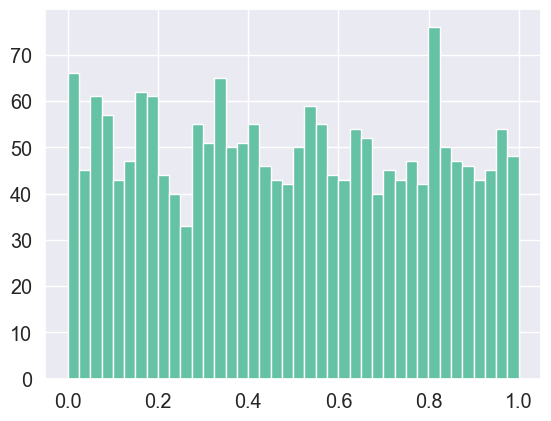

In [77]:
plt.hist(p_vals, bins =40);

In [74]:
(np.array(p_vals) < 0.05).sum()

111

**Вывод:** Могло быть и лучше, больше сходит на равномерное распределение, но мы чаще не отвергаем нулевую гипотезу, что хорошо

**2.** С помощью проведения AB-тестов узнайте, какова мощность теста для разных значений "температуры" (постройте график). Для наглядности используйте логарифмическое разбиение шкалы "температуры" `np.logspace` и стройте график в логарифмическом масштабе

In [69]:
Ts = np.logspace(0.001, 1, 20)

In [70]:
samples_f1, _ = sample_gas(11, P_b)
samples_f1.mean()

16.329699578416093

In [71]:
%%time
n_errors = []
sample_size = 1000
n_iter = 100
alpha = 0.05
for T in Ts:
    n_errors.append(0)
    for _ in range(n_iter):
        samples_f1, _ = sample_gas(T, P_f)
        samples_f2, _ = sample_gas(T, P_f) + sps.norm(3, 1).rvs()
        n_errors[-1] += sps.ttest_ind(samples_f1, samples_f2,equal_var=False).pvalue < alpha

<timed exec>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Wall time: 29min 17s


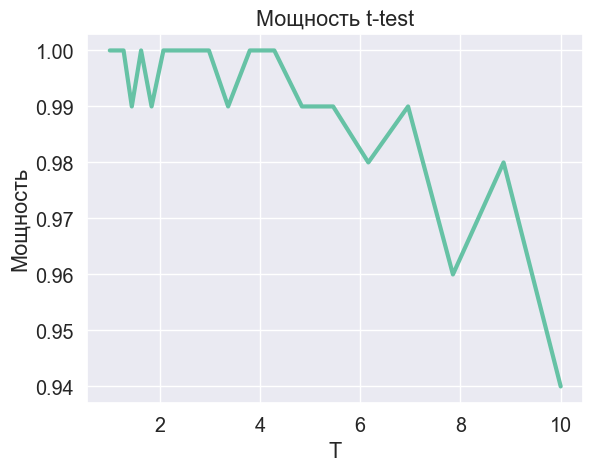

In [75]:
plt.plot(Ts, np.array(n_errors)/n_iter, lw=3)
plt.semilogx
plt.title('Мощность t-test')
plt.xlabel('T')
plt.ylabel('Мощность');

**Вывод:**

Мощность различна для разных T, но всё равно достаточно высокая

### Задача 3 
#### **Профиль физика**


Рассмотрим [данные о RGB (Red Giant Branch) и
HeB (Helium Burning) звездах](https://www.kaggle.com/datasets/fernandolima23/classification-in-asteroseismology?select=classification_in_asteroseismology.csv):

Датасет содержит информацию о звездах, целевая переменная — класс звезд.

С помощью методов дисперсионного анализа исследуйте, по каким параметрам наблюдается различие между двумя рассматриваемыми классами (звездами RGB и HeB). При возможности оцените также степень различия, в т.ч. доверительный интервал.

Скачайте файл и визуализируйте колонки (например, pairplot):
* `Dnu` &mdash; разделение мод с одинаковой степенью и последовательным порядком;
* `numax` &mdash; частота максимальной мощности колебаний;
* `epsilon` &mdash; расположение режима l=0 ;
* `Pop` &mdash; Population (0 = RGB, 1 = HeB)

In [2]:
data = pd.read_csv('classification_in_asteroseismology.csv')

In [3]:
data

,POP,Dnu,numax,epsilon
0,1,4.44780,43.06289,0.985
1,0,6.94399,74.07646,0.150
2,1,2.64571,21.57891,0.855
3,1,4.24168,32.13189,0.840
4,0,10.44719,120.37356,0.275
...,...,...,...,...
996,0,5.51582,49.99920,0.060
997,1,4.14823,32.09069,0.930
998,1,3.98294,30.90257,0.880
999,1,4.33893,45.62183,0.975


C:\Users\AsusPro\anaconda3\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\AsusPro\anaconda3\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\AsusPro\anaconda3\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


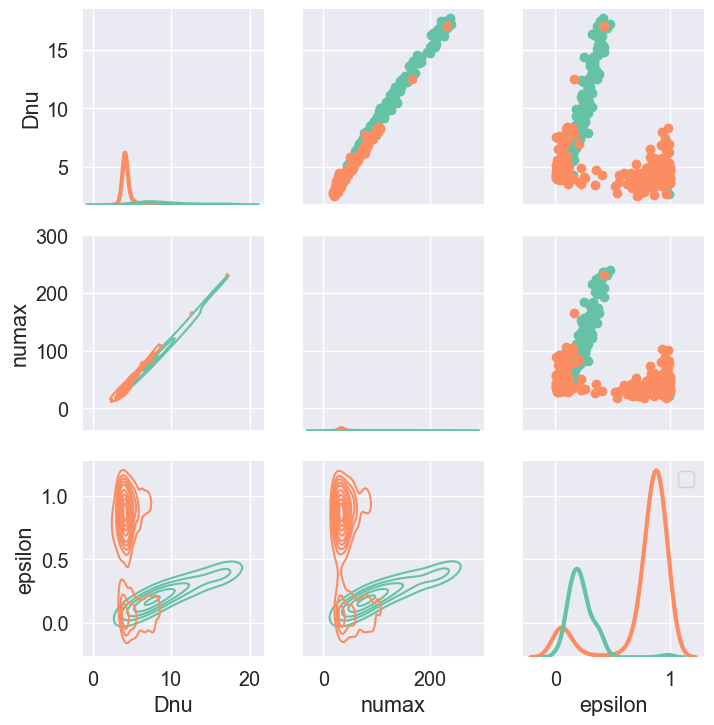

In [4]:
g = sns.PairGrid(data, hue='POP')
g.map_lower(sns.kdeplot, cmap ="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.legend();

Насколько сильно отличаются распределения между классами? Есть ли очевидные отличия, сдвиг?

**Вывод:** Очевидный сдвиг по Dnu и epsilon

Оцените, по каким признакам различаются классы, степень различия (сдвиг) и доверительный интервал сдвига. В качестве доверительного интервала используйте бутстрепный перцентильный. Объясните выбор статистического теста.

Подсказка: выбирая статистический тест и интерпретируя результаты, помните о нулевой гипотезе и мощности. Например, немного об этом в контексте АВ тестов можно почитать [здесь](https://https://habr.com/ru/companies/avito/articles/709596/).

In [45]:
def shift(x, y):
    W = np.subtract.outer(x,y)
    return np.median(W)

def bootstrap_ic(X,y, alpha, B = 1000):
    shifts = []
    for _ in range(B):
        indexes = np.random.choice(range(len(X)),len(X), replace = True)
        shifts.append(shift(X[indexes],y[indexes]))
    shifts = np.sort(shifts)
    return shifts[math.floor((B*(1-alpha)/2))], shifts[math.ceil((B*(1+alpha)/2))]


def estimation(data, target, feature, p_values, shifts, ci_lefts, ci_rights, alpha=0.05):
    x = feature.values
    y = target.values

    p_values.append(sps.ttest_ind(x[y == 0], x[y == 1],equal_var=False).pvalue)

    shifts.append(shift(x, y))
    
    res = bootstrap_ic(x,y, alpha, B = 10000) # бутстрепный доверительный интервал
    ci_lefts.append(res[0])
    ci_rights.append(res[1])


In [46]:
p_values, shifts, ci_lefts, ci_rights = [], [], [], []
for column in tqdm(data.columns[1:]):
    estimation(data, data['POP'],data[column],p_values, shifts, ci_lefts, ci_rights)

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [07:11<00:00, 143.91s/it]


In [47]:
results = {'feature': data.columns[1:],
           'p_value': p_values,
           'shift': shifts,
           'ci_left': ci_lefts,
           'ci_right': ci_rights}
results = pd.DataFrame(results)

In [48]:
results

,feature,p_value,shift,ci_left,ci_right
0,Dnu,1.409979e-69,3.97486,3.96287,3.97529
1,numax,1.257573e-63,37.50428,37.49047,37.51415
2,epsilon,3.704537e-223,-0.12000,-0.12000,-0.12000


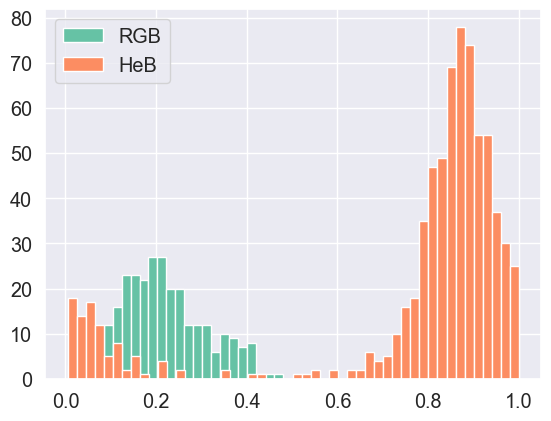

In [58]:
plt.hist(data['epsilon'][data["POP"] == 0], bins = 50, label = "RGB")
plt.hist(data['epsilon'][data["POP"] == 1], bins = 50, label = "HeB")
plt.legend()

In [55]:
(data['POP'] == 1).sum()

713

*Замечание.* Строго говоря, необходима поправка на множественное тестирование

Какой тест вы использовали и почему? Какие выводы можно сделать по p_value? Как доверительный интервал подтверждает эти выводы? Дополнительно: обратите внимание на `epsilon`: корректно ли оценивать сдвиг между распределениями по этой величине?

**Вывод:**

Использовал ттест, потому что нам не известно о распределении, равенстве дисперсий и выборки независимые.

По pvalue можно сказать, что у выборок есть явный сдвиг по всем фичам. Это подтвержается малыми доверительными интервалами, далёких от нуля.

Для epsilon видно, что HeB имеет 2 пика(в 0 и 0.9), поэтому сдвиг в этом случае оценивать не имеет смысла.